<a href="https://colab.research.google.com/github/Diya-Amith/Data-Science-Project-Galaxy-Morphology-Classification-Using-Deep-Learning-and-Explainable-AI-/blob/main/Reworked_Code_V1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GALAXY MORPHOLOGY CLASSIFICATION USING DEEP LEARNING AND EXPLAINABLE AI**

## **Import Libraries and Initial Loading**

In [ ]:
!pip install imbalanced-learn


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 4.7 MB/s eta 0:00:00


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image
import tensorflow as tf
from google.colab import drive
import cv2
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras import layers, models, optimizers, regularizers
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras import layers, models
import random
from sklearn.utils import class_weight
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.regularizers import l2
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.models import load_model
import pickle
import shutil
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
"""import zipfile
import os

# Path to your Google Drive folder
zip_file_path_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1.zip'
zip_file_path_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1.zip'

# Folder where you want to extract the contents
extract_folder_1 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1'
extract_folder_2 = '/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1'

# Unzipping the files
with zipfile.ZipFile(zip_file_path_1, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_1)

with zipfile.ZipFile(zip_file_path_2, 'r') as zip_ref:
    zip_ref.extractall(extract_folder_2)"""

In [3]:

train_images_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/images_training_rev1"
labels_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/training_solutions_rev1.csv"



## **Preprocessing**

### **Labels**

In [4]:
# Load labels
labels_df = pd.read_csv(labels_path)


In [5]:
labels_df.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class9.3  Class10.1  Class10.2  \
0  0.578401  0.418398  0.198455  ...  0.000000   0.279952   0.138445   
1  0.165229  0.591328  0.041271  ...  0.018764   0.000000   0.131378   
2  0.177352  0.000000  0.177352  ...  0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...  0.000000   0.094549   0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000   0.000000   0.000000   

   Class10.3  Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  
0   0.000000   0.000000   0.092886        0.0        0.0        0.0   0.325512  
1   0.459950   0.000000   0.591328        0.0        0.0        0.0   0.000000  
2   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  
3   0.094549   0.189098   0.000000        0.0        0.0        0.0   0.000000  
4   0.000000   0.000000   0.000000        0.0        0.0        0.0   0.000000  

[5 rows x 38 columns]

In [6]:
labels_df.shape

(61578, 38)

In [7]:
labels_df['image_path'] = labels_df['GalaxyID'].astype(str) + '.jpg'
labels_df.head()

GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
0  0.578401  0.418398  0.198455  ...   0.279952   0.138445   0.000000   
1  0.165229  0.591328  0.041271  ...   0.000000   0.131378   0.459950   
2  0.177352  0.000000  0.177352  ...   0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...   0.094549   0.000000   0.094549   
4  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   

   Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  \
0   0.000000   0.092886        0.0        0.0        0.0   0.325512   
1   0.000000   0.591328        0.0        0.0        0.0   0.000000   
2   0.000000   0.000000        0.0        0.0        0.0   0.000000   
3   0.189098   0.000000        0.0        0.0        0.0   0.000000   
4   0.000000   0.000000        0.0        0.0        0.0   0.000000   

   image_path  
0  100008.jpg  
1  100023.jpg  
2  100053.jpg  
3  100078.jpg  
4  100090.jpg  

[5 rows x 39 columns]

In [8]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 39 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   GalaxyID    61578 non-null  int64  
 1   Class1.1    61578 non-null  float64
 2   Class1.2    61578 non-null  float64
 3   Class1.3    61578 non-null  float64
 4   Class2.1    61578 non-null  float64
 5   Class2.2    61578 non-null  float64
 6   Class3.1    61578 non-null  float64
 7   Class3.2    61578 non-null  float64
 8   Class4.1    61578 non-null  float64
 9   Class4.2    61578 non-null  float64
 10  Class5.1    61578 non-null  float64
 11  Class5.2    61578 non-null  float64
 12  Class5.3    61578 non-null  float64
 13  Class5.4    61578 non-null  float64
 14  Class6.1    61578 non-null  float64
 15  Class6.2    61578 non-null  float64
 16  Class7.1    61578 non-null  float64
 17  Class7.2    61578 non-null  float64
 18  Class7.3    61578 non-null  float64
 19  Class8.1    61578 non-nul

In [9]:
# missing values
missing_values = labels_df.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)

if missing_values.sum() > 0:
    print("\nThere are missing values in the dataset.")
else:
    print("\nNo missing values in the dataset.")

Missing Values in Each Column:
GalaxyID      0
Class1.1      0
Class1.2      0
Class1.3      0
Class2.1      0
Class2.2      0
Class3.1      0
Class3.2      0
Class4.1      0
Class4.2      0
Class5.1      0
Class5.2      0
Class5.3      0
Class5.4      0
Class6.1      0
Class6.2      0
Class7.1      0
Class7.2      0
Class7.3      0
Class8.1      0
Class8.2      0
Class8.3      0
Class8.4      0
Class8.5      0
Class8.6      0
Class8.7      0
Class9.1      0
Class9.2      0
Class9.3      0
Class10.1     0
Class10.2     0
Class10.3     0
Class11.1     0
Class11.2     0
Class11.3     0
Class11.4     0
Class11.5     0
Class11.6     0
image_path    0
dtype: int64

No missing values in the dataset.


### **Images**

In [11]:
# number of images
train_image_count = len(os.listdir(train_images_path))

print(f"Number of images in training folder: {train_image_count}")

Number of images in training folder: 61578


In [12]:
# list of image file names in the training folder
training_images = set(os.listdir(train_images_path))

filtered_labels_df = labels_df[labels_df['image_path'].isin(training_images)].copy()

filtered_labels_df.reset_index(drop=True, inplace=True)

print(f"Number of images in training folder: {len(training_images)}")
print(f"Number of rows in filtered_labels_df: {filtered_labels_df.shape[0]}")
filtered_labels_df.head()

Number of images in training folder: 61578
Number of rows in filtered_labels_df: 61578


GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
0    100008  0.383147  0.616853  0.000000  0.000000  0.616853  0.038452   
1    100023  0.327001  0.663777  0.009222  0.031178  0.632599  0.467370   
2    100053  0.765717  0.177352  0.056931  0.000000  0.177352  0.000000   
3    100078  0.693377  0.238564  0.068059  0.000000  0.238564  0.109493   
4    100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   

   Class3.2  Class4.1  Class4.2  ...  Class10.1  Class10.2  Class10.3  \
0  0.578401  0.418398  0.198455  ...   0.279952   0.138445   0.000000   
1  0.165229  0.591328  0.041271  ...   0.000000   0.131378   0.459950   
2  0.177352  0.000000  0.177352  ...   0.000000   0.000000   0.000000   
3  0.129071  0.189098  0.049466  ...   0.094549   0.000000   0.094549   
4  0.000000  0.000000  0.000000  ...   0.000000   0.000000   0.000000   

   Class11.1  Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  \
0   0.000000   0.092886        0.0        0.0        0.0   0.325512   
1   0.000000   0.591328        0.0        0.0        0.0   0.000000   
2   0.000000   0.000000        0.0        0.0        0.0   0.000000   
3   0.189098   0.000000        0.0        0.0        0.0   0.000000   
4   0.000000   0.000000        0.0        0.0        0.0   0.000000   

   image_path  
0  100008.jpg  
1  100023.jpg  
2  100053.jpg  
3  100078.jpg  
4  100090.jpg  

[5 rows x 39 columns]

In [13]:
def refine_classification(row):
    if row['Class1.2'] >= 0.9:
        return 'Spiral'
    elif row['Class1.1'] >= 0.85:
        return 'Elliptical'
    elif row['Class8.3'] > 0.5 or row['Class8.4'] > 0.5 or row['Class8.5'] > 0.5:
        return 'Irregular'
    else:
        return None

# Apply the refine_classification function to classify galaxies
filtered_labels_df['Galaxy_Type'] = filtered_labels_df.apply(refine_classification, axis=1)

# Filter out rows where Galaxy_Type is None (Uncertain galaxies)
filtered_galaxies_df = filtered_labels_df[filtered_labels_df['Galaxy_Type'].notna()]

# Check the distribution of galaxy types in the new DataFrame
print(filtered_galaxies_df['Galaxy_Type'].value_counts())


Galaxy_Type
Spiral        8776
Elliptical    5110
Irregular      462
Name: count, dtype: int64


In [14]:
# Create a new DataFrame for Spiral and Elliptical galaxies
spiral_elliptical_df = filtered_galaxies_df[filtered_galaxies_df['Galaxy_Type'].isin(['Spiral', 'Elliptical'])]

print(spiral_elliptical_df.head())

print(len(spiral_elliptical_df))

    GalaxyID  Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
4     100090  0.933839  0.000000  0.066161  0.000000  0.000000  0.000000   
8     100134  0.021834  0.976952  0.001214  0.021751  0.955201  0.313077   
19    100322  0.091987  0.908013  0.000000  0.816806  0.091207  0.000000   
22    100380  0.030000  0.970000  0.000000  0.043650  0.926350  0.463175   
35    100520  0.042430  0.957570  0.000000  0.579788  0.377782  0.103912   

    Class3.2  Class4.1  Class4.2  ...  Class10.2  Class10.3  Class11.1  \
4   0.000000  0.000000  0.000000  ...   0.000000   0.000000        0.0   
8   0.642124  0.546491  0.408711  ...   0.152044   0.187194        0.0   
19  0.091207  0.000000  0.091207  ...   0.000000   0.000000        0.0   
22  0.463175  0.926350  0.000000  ...   0.463175   0.000000        0.0   
35  0.273870  0.148593  0.229189  ...   0.000000   0.148593        0.0   

    Class11.2  Class11.3  Class11.4  Class11.5  Class11.6  image_path  \
4    0.000000   0.000000 

In [15]:
# Create a new DataFrame with only the necessary columns
new_galaxy_df = spiral_elliptical_df[['GalaxyID','Galaxy_Type', 'image_path']]

# Preview the new DataFrame
print(new_galaxy_df.head())


    GalaxyID Galaxy_Type  image_path
4     100090  Elliptical  100090.jpg
8     100134      Spiral  100134.jpg
19    100322      Spiral  100322.jpg
22    100380      Spiral  100380.jpg
35    100520      Spiral  100520.jpg


In [19]:
# Save it to a CSV file if needed
new_galaxy_df.to_csv('spiral_elliptical.csv', index=False)

In [16]:
print(f'Total number of galaxies: {len(new_galaxy_df)}')


Total number of galaxies: 13886


In [17]:
# Apply Label Encoding to the class column in balanced_data
label_encoder = LabelEncoder()
new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])

# Check the mapping of labels to encoded values
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label Encoding Mapping:")
print(label_mapping)

# Check the updated balanced_data DataFrame
print("Balanced DataFrame with Encoded Classes:")
print(new_galaxy_df.head())

Label Encoding Mapping:
{'Elliptical': 0, 'Spiral': 1}
Balanced DataFrame with Encoded Classes:
    GalaxyID Galaxy_Type  image_path  class_encoded
4     100090  Elliptical  100090.jpg              0
8     100134      Spiral  100134.jpg              1
19    100322      Spiral  100322.jpg              1
22    100380      Spiral  100380.jpg              1
35    100520      Spiral  100520.jpg              1


<ipython-input-17-95caf580d9f0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_galaxy_df['class_encoded'] = label_encoder.fit_transform(new_galaxy_df['Galaxy_Type'])


## **EDA**

In [ ]:
image_filename = new_galaxy_df.iloc[0]['image_path']  # Change index as needed
image_path = os.path.join(train_images_path, image_filename)

# Check image size
image = Image.open(image_path)
print(f"Image size for {image_filename}: {image.size}")

# Display a random image from the folder
random_image_filename = random.choice(new_galaxy_df['image_path'])  # Get a random image filename
random_image_path = os.path.join(train_images_path, random_image_filename)  # Construct the full path
random_image = Image.open(random_image_path)  # Open the image

plt.imshow(random_image)
plt.title(f"Galaxy Type: {new_galaxy_df.iloc[0]['Galaxy_Type']}, ID: {new_galaxy_df.iloc[0]['GalaxyID']}")
plt.axis('off')
plt.show()

Image size for 100090.jpg: (424, 424)


KeyError: 1430

## **Data Splitting**

In [18]:
# Create an empty list to store the selected images
limited_data = []

# Loop through each class and select up to 3000 images
for class_label in new_galaxy_df['class_encoded'].unique():
    # Filter images belonging to the class
    class_data = new_galaxy_df[new_galaxy_df['class_encoded'] == class_label]
    # If class has more than 3000 images, take the first 3000, otherwise take all
    class_data_limited = class_data.head(3000)
    limited_data.append(class_data_limited)

# Concatenate all selected images into a new DataFrame
limited_df = pd.concat(limited_data)


In [19]:
# Check the distribution of classes in the limited_df
class_distribution = limited_df['class_encoded'].value_counts()

# Print the class distribution
print("Class Distribution in Limited DataFrame:")
print(class_distribution)


Class Distribution in Limited DataFrame:
class_encoded
0    3000
1    3000
Name: count, dtype: int64


In [20]:
# Directories for split data
base_dir = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/split_data"
train_dir = os.path.join(base_dir, "training")
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "testing")

In [21]:
# Create subdirectories for each class in train, val, and test
classes = ['Spiral', 'Elliptical']
for split in [train_dir, val_dir, test_dir]:
    os.makedirs(split, exist_ok=True)
    for cls in classes:
        os.makedirs(os.path.join(split, cls), exist_ok=True)

In [22]:
# Split the data
X = limited_df['image_path']
y = limited_df['Galaxy_Type']

# First split into train and temp (validation + test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Split temp into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Helper function to copy images to their respective folders
def copy_images(image_paths, labels, dest_dir):
    for image_path, label in zip(image_paths, labels):
        # Get source image path
        src = os.path.join(train_images_path, image_path)
        # Destination path
        dest = os.path.join(dest_dir, label, image_path)
        shutil.copy(src, dest)

# Copy images to the split folders
copy_images(X_train, y_train, train_dir)
copy_images(X_val, y_val, val_dir)
copy_images(X_test, y_test, test_dir)

print("Images successfully split and saved into folders:")
print(f"Training: {len(X_train)} images")
print(f"Validation: {len(X_val)} images")
print(f"Testing: {len(X_test)} images")


Images successfully split and saved into folders:
Training: 4200 images
Validation: 900 images
Testing: 900 images


In [ ]:
"""from sklearn.model_selection import train_test_split

# Assuming you have your dataset in new_galaxy_df with a column 'class_encoded' representing the labels

# Split the dataset into training and validation sets using stratified sampling
X = limited_df['image_path']  # Features (image paths or any other feature)
y = limited_df['class_encoded']  # Labels (encoded galaxy types)

# Perform the split, ensuring stratification based on the 'class_encoded' column
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Combine the X_train and y_train into a new dataframe for the training set
train_df = pd.DataFrame({'image_path': X_train, 'class_encoded': y_train})

# Combine the X_val and y_val into a new dataframe for the validation set
val_df = pd.DataFrame({'image_path': X_val, 'class_encoded': y_val})

# Check the distribution of classes in the training and validation sets
print("Training Set Class Distribution:")
print(train_df['class_encoded'].value_counts())

print("\nValidation Set Class Distribution:")
print(val_df['class_encoded'].value_counts())
"""

Training Set Class Distribution:
class_encoded
1    2000
0    2000
Name: count, dtype: int64

Validation Set Class Distribution:
class_encoded
0    500
1    500
Name: count, dtype: int64


## **Augmentation**

In [23]:
# Data augmentation settings
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalize pixel values to [0, 1]
    rotation_range=30,        # Rotate images by up to 30 degrees
    width_shift_range=0.2,    # Shift images horizontally by 20% of the width
    height_shift_range=0.2,   # Shift images vertically by 20% of the height
    shear_range=0.15,         # Shear transformation
    zoom_range=0.2,           # Zoom in/out by 20%
    horizontal_flip=True,     # Flip images horizontally
    brightness_range=[0.8, 1.2],  # Adjust brightness
    fill_mode='nearest'       # Fill missing pixels after transformations
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False  # Ensure consistency for evaluation
)

Found 4200 images belonging to 2 classes.
Found 900 images belonging to 2 classes.
Found 900 images belonging to 2 classes.


## **Model 1: VGG16**

### **Initialisation**

In [24]:
# Load the VGG16 model (without the top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base (optional, unfreeze later for fine-tuning)
for layer in base_model.layers[:-8]:  # Freeze all but the last 10 layers
    layer.trainable = False


58889256/58889256 [==============================] - 0s 0us/step


In [25]:
# Add custom layers on top of the base model
inputs = base_model.input
x = base_model.output
x = GlobalAveragePooling2D()(x)        # Replace Flatten with GAP to reduce overfitting
x = Dropout(0.3)(x)                    # Add dropout for regularization
x = Dense(512, activation='relu')(x)   # Fully connected layer
x = Dense(256, activation='relu')(x)   # Another fully connected layer
outputs = Dense(2, activation='softmax')(x)  # Output layer with softmax activation (2 classes)

# Final model
model = Model(inputs=inputs, outputs=outputs)

In [26]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-5),  # Fine-tuning with a small learning rate
    loss='categorical_crossentropy',     # Loss for multi-class classification
    metrics=['accuracy']                 # Evaluate using accuracy
)

# Model summary
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [27]:
# Callbacks
checkpoint_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_best_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),  # Stop early if no improvement
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)  # Save the best model
]

### **Training**

In [29]:
# Train the model
history = model.fit(
    train_generator,
    epochs=15,                          # Set more epochs if needed
    validation_data=val_generator,
    callbacks=callbacks
)


Epoch 1/15
66/66 [==============================] - ETA: 0s - loss: 0.6187 - accuracy: 0.6533

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 207s 3s/step - loss: 0.6187 - accuracy: 0.6533 - val_loss: 0.3033 - val_accuracy: 0.9022
Epoch 2/15
66/66 [==============================] - 202s 3s/step - loss: 0.2671 - accuracy: 0.9033 - val_loss: 0.1245 - val_accuracy: 0.9511
Epoch 3/15
66/66 [==============================] - 203s 3s/step - loss: 0.1457 - accuracy: 0.9498 - val_loss: 0.0840 - val_accuracy: 0.9678
Epoch 4/15
66/66 [==============================] - 203s 3s/step - loss: 0.0946 - accuracy: 0.9693 - val_loss: 0.0749 - val_accuracy: 0.9744
Epoch 5/15
66/66 [==============================] - 203s 3s/step - loss: 0.0836 - accuracy: 0.9702 - val_loss: 0.0647 - val_accuracy: 0.9733
Epoch 6/15
66/66 [==============================] - 201s 3s/step - loss: 0.0752 - accuracy: 0.9745 - val_loss: 0.0695 - val_accuracy: 0.9744
Epoch 7/15
66/66 [==============================] - 202s 3s/step - loss: 0.0688 - accuracy: 0.9776 - val_loss: 0.0592 - val_accuracy: 0.9756
Epoch 8/15
66/66 [======

In [30]:
# Save the final model
model.save("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_model.h5")


In [31]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


15/15 [==============================] - 16s 1s/step - loss: 0.0333 - accuracy: 0.9889
Test Loss: 0.0333235003054142
Test Accuracy: 0.9888888597488403


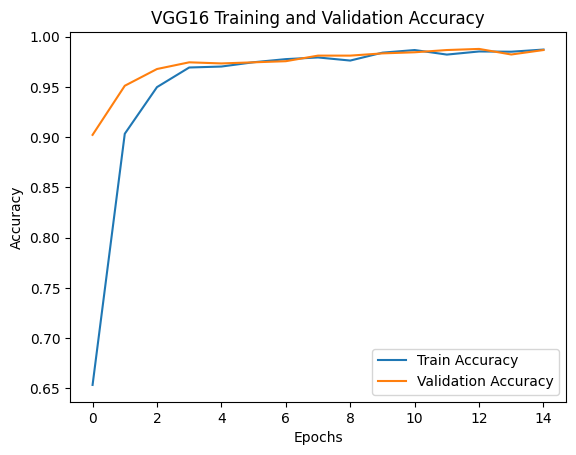

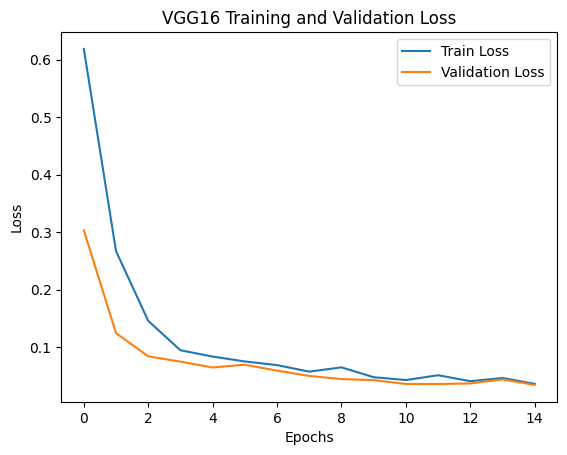

In [32]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('VGG16 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('VGG16 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 [==============================] - 17s 1s/step


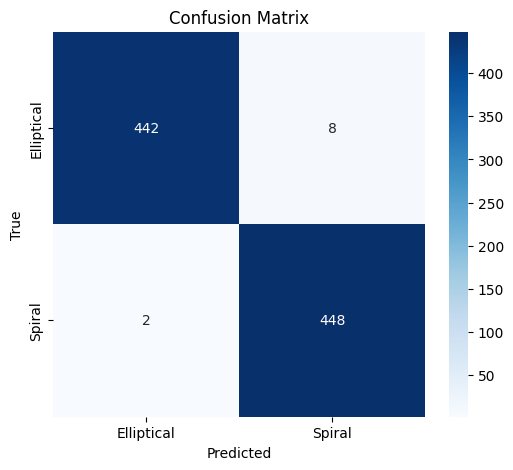

Classification Report:
              precision    recall  f1-score   support

  Elliptical       1.00      0.98      0.99       450
      Spiral       0.98      1.00      0.99       450

    accuracy                           0.99       900
   macro avg       0.99      0.99      0.99       900
weighted avg       0.99      0.99      0.99       900



In [33]:
# Confusion matrix
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Generate predictions
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)  # Predicted class indices
y_true = test_generator.classes             # True class indices

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


1/1 [==============================] - 0s 71ms/step


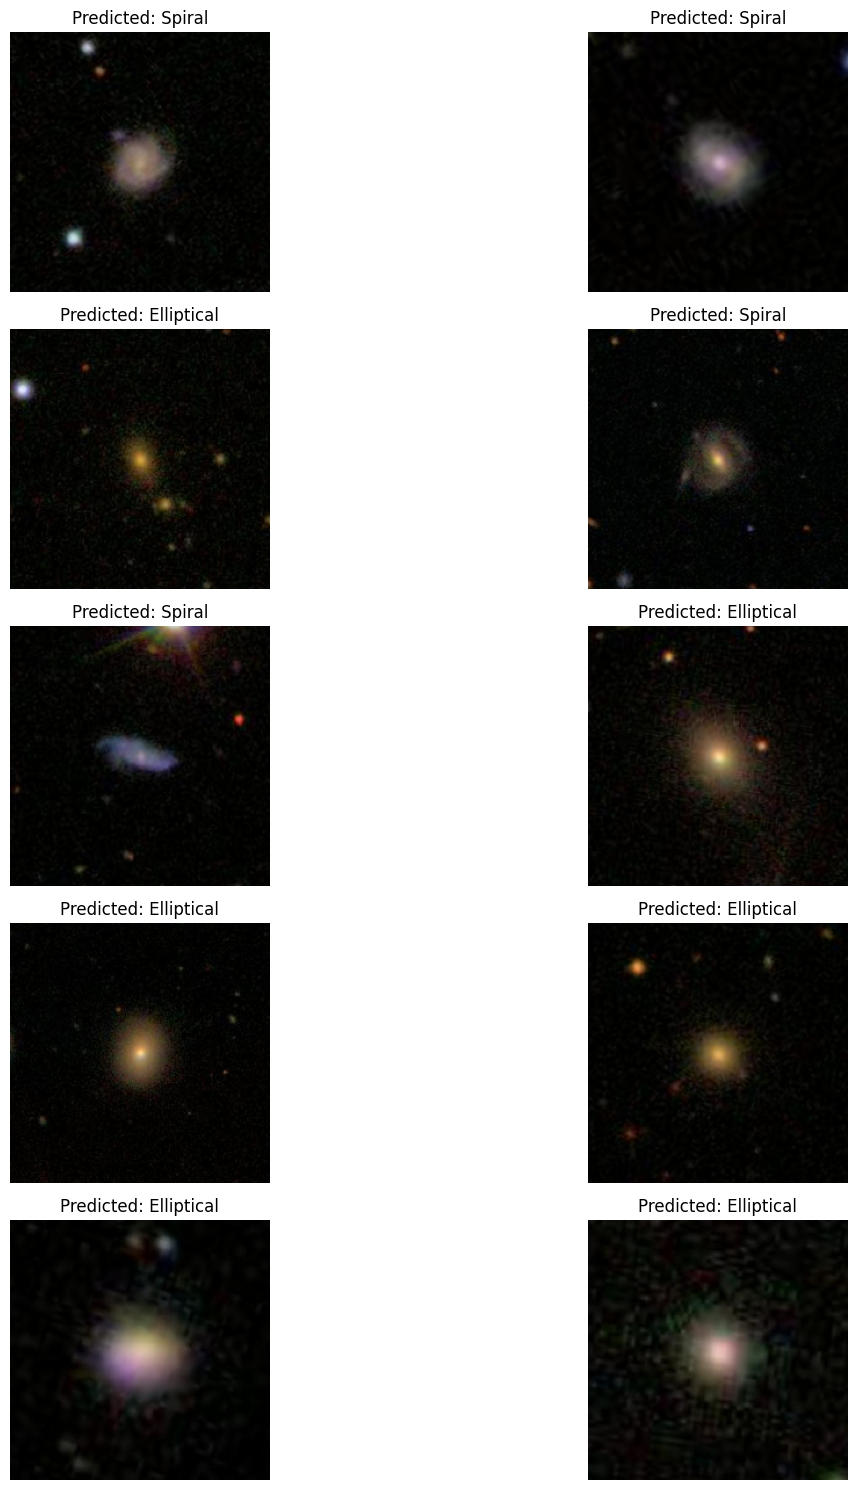

In [34]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Class labels mapping
class_labels = list(test_generator.class_indices.keys())  # ['Elliptical', 'Spiral']

# Directory containing the test images
test_images_dir = test_dir  # Update if your test directory path is different

# Function to load and preprocess a single image
def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Load image and resize
    img_array = img_to_array(img)                      # Convert to array
    img_array = np.expand_dims(img_array, axis=0)      # Add batch dimension
    img_array = img_array / 255.0                      # Normalize pixel values
    return img, img_array

# Select 10 random images from the test set
all_test_images = []
for root, dirs, files in os.walk(test_images_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):   # Ensure only image files are selected
            all_test_images.append(os.path.join(root, file))

random_images = random.sample(all_test_images, 10)

# Predict and display the images
plt.figure(figsize=(15, 15))

for i, image_path in enumerate(random_images):
    # Preprocess the image
    original_img, preprocessed_img = preprocess_image(image_path)

    # Make a prediction
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    # Display the image
    plt.subplot(5, 2, i + 1)
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


### **Validation**

### **Prediction**

## **Model 2: RESNE50:**

### **Initialisation**

In [35]:
# Load ResNet50 model (without the top layers)
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze initial layers
for layer in base_model.layers[:-8]:  # Freeze all but the last 10 layers
    layer.trainable = False


94765736/94765736 [==============================] - 1s 0us/step


In [36]:
# Add custom layers on top
inputs = base_model.input
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(2, activation='softmax')(x)

# Final model
model = Model(inputs=inputs, outputs=outputs)

In [37]:
# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [38]:
# Callbacks
checkpoint_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/ResNet50_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]

### **Training**

In [39]:
# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/15
66/66 [==============================] - ETA: 0s - loss: 0.7035 - accuracy: 0.5010

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 122s 2s/step - loss: 0.7035 - accuracy: 0.5010 - val_loss: 0.6928 - val_accuracy: 0.5000
Epoch 2/15
66/66 [==============================] - 117s 2s/step - loss: 0.6954 - accuracy: 0.5145 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 3/15
66/66 [==============================] - 117s 2s/step - loss: 0.6944 - accuracy: 0.5160 - val_loss: 0.7005 - val_accuracy: 0.5000
Epoch 4/15
66/66 [==============================] - 118s 2s/step - loss: 0.6922 - accuracy: 0.5317 - val_loss: 0.6901 - val_accuracy: 0.5000
Epoch 5/15
66/66 [==============================] - 117s 2s/step - loss: 0.6902 - accuracy: 0.5350 - val_loss: 0.6916 - val_accuracy: 0.5000
Epoch 6/15
66/66 [==============================] - 117s 2s/step - loss: 0.6869 - accuracy: 0.5464 - val_loss: 0.6806 - val_accuracy: 0.5044
Epoch 7/15
66/66 [==============================] - 117s 2s/step - loss: 0.6825 - accuracy: 0.5588 - val_loss: 0.6741 - val_accuracy: 0.5300
Epoch 8/15
66/66 [======

### **Validation**

In [40]:
# Save the final model
model.save("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/ResNet50_model.h5")

In [41]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

15/15 [==============================] - 16s 1s/step - loss: 0.6232 - accuracy: 0.6689
Test Loss: 0.6231598854064941
Test Accuracy: 0.6688888669013977


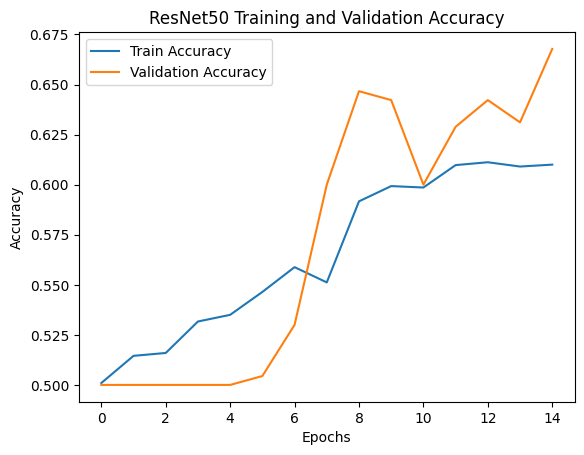

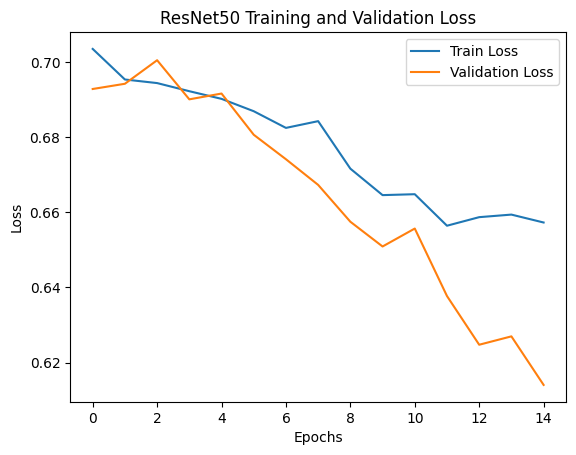

In [42]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ResNet50 Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 [==============================] - 17s 1s/step


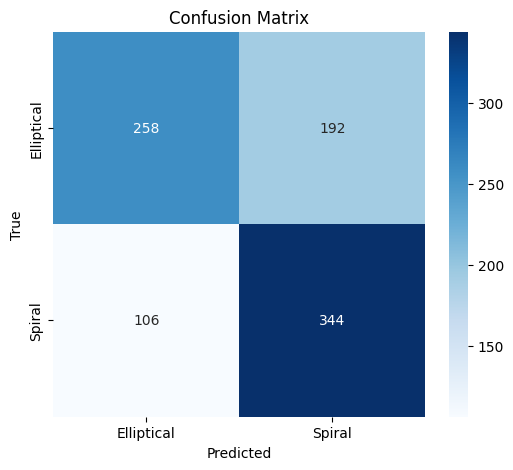

In [43]:
# Confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [44]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))


Classification Report:
              precision    recall  f1-score   support

  Elliptical       0.71      0.57      0.63       450
      Spiral       0.64      0.76      0.70       450

    accuracy                           0.67       900
   macro avg       0.68      0.67      0.67       900
weighted avg       0.68      0.67      0.67       900



1/1 [==============================] - 0s 83ms/step


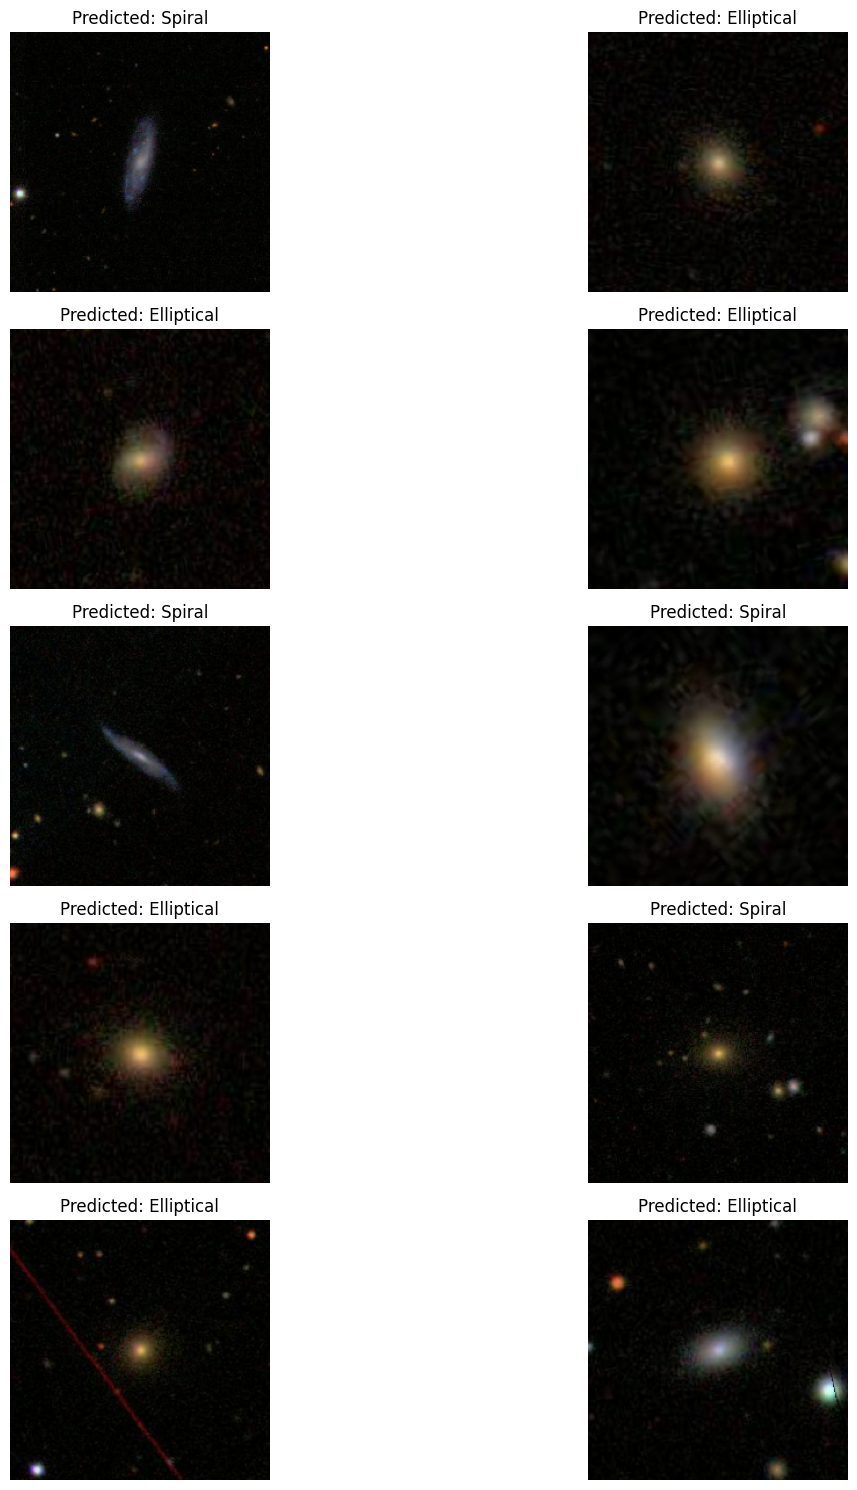

In [45]:
# Predict 10 random images
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class_labels = list(test_generator.class_indices.keys())

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array

all_test_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_test_images.append(os.path.join(root, file))

random_images = random.sample(all_test_images, 10)

plt.figure(figsize=(15, 15))
for i, image_path in enumerate(random_images):
    original_img, preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    plt.subplot(5, 2, i + 1)
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## **Model 3: Custom_CNN**

### **Initialisation**

In [46]:
# Custom CNN model
def create_custom_cnn():
    model = Sequential([
        # Convolutional layers
        Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),

        # Fully connected layers
        Flatten(),
        Dense(512, activation='relu'),
        Dropout(0.3),  # Dropout for regularization
        Dense(256, activation='relu'),
        Dropout(0.3),
        Dense(2, activation='softmax')  # Output layer for 2 classes
    ])
    return model

In [47]:
# Create the model
model = create_custom_cnn()

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 26, 26, 128)       0

In [48]:
# Callbacks
checkpoint_path = "/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CustomCNN_model.h5"
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True)
]


### **Training**

In [49]:
# Train the model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=val_generator,
    callbacks=callbacks
)

Epoch 1/15
66/66 [==============================] - ETA: 0s - loss: 0.6103 - accuracy: 0.6564

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 95s 1s/step - loss: 0.6103 - accuracy: 0.6564 - val_loss: 0.4362 - val_accuracy: 0.8367
Epoch 2/15
66/66 [==============================] - 98s 1s/step - loss: 0.4823 - accuracy: 0.7931 - val_loss: 0.3923 - val_accuracy: 0.8378
Epoch 3/15
66/66 [==============================] - 98s 1s/step - loss: 0.4161 - accuracy: 0.8233 - val_loss: 0.3355 - val_accuracy: 0.8667
Epoch 4/15
66/66 [==============================] - 98s 1s/step - loss: 0.3711 - accuracy: 0.8460 - val_loss: 0.2732 - val_accuracy: 0.8911
Epoch 5/15
66/66 [==============================] - 100s 1s/step - loss: 0.3291 - accuracy: 0.8688 - val_loss: 0.2451 - val_accuracy: 0.8989
Epoch 6/15
66/66 [==============================] - 96s 1s/step - loss: 0.3160 - accuracy: 0.8743 - val_loss: 0.2499 - val_accuracy: 0.9089
Epoch 7/15
66/66 [==============================] - 93s 1s/step - loss: 0.2933 - accuracy: 0.8805 - val_loss: 0.2242 - val_accuracy: 0.9156
Epoch 8/15
66/66 [============

In [50]:
# Save the final model
model.save("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CustomCNN_model.h5")

### **Validation**

In [51]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

15/15 [==============================] - 5s 332ms/step - loss: 0.1928 - accuracy: 0.9189
Test Loss: 0.19279395043849945
Test Accuracy: 0.9188888669013977


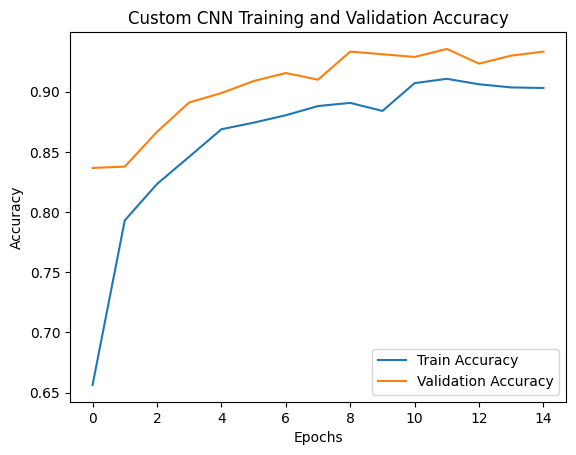

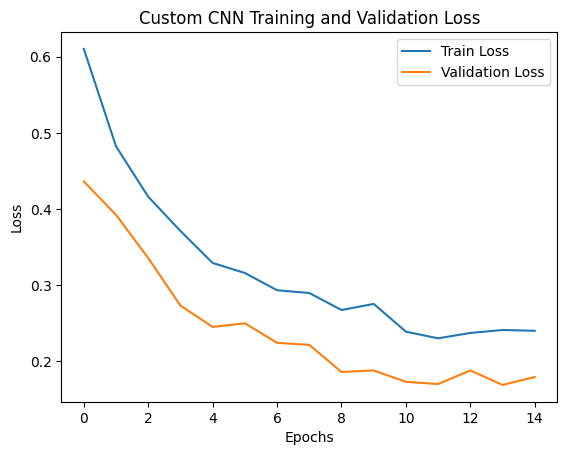

In [52]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Custom CNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Custom CNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

15/15 [==============================] - 5s 349ms/step


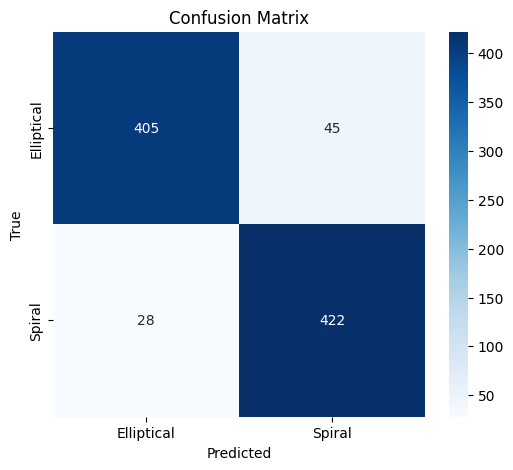

In [53]:
# Confusion matrix
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(),
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [54]:
# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys()))

Classification Report:
              precision    recall  f1-score   support

  Elliptical       0.94      0.90      0.92       450
      Spiral       0.90      0.94      0.92       450

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900



1/1 [==============================] - 0s 51ms/step


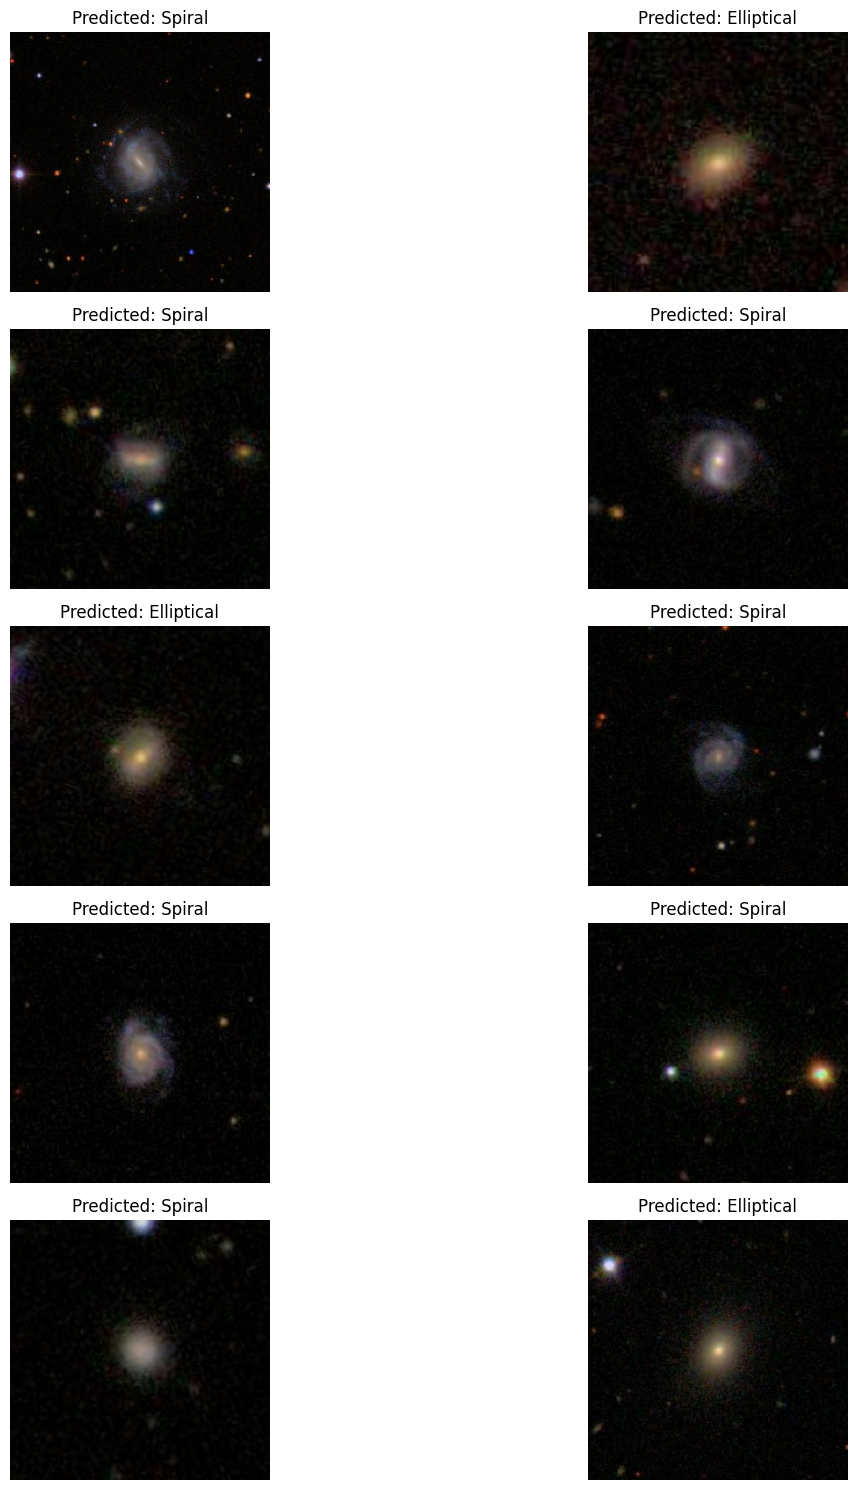

In [55]:
# Predict 10 random images
class_labels = list(test_generator.class_indices.keys())

def preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0
    return img, img_array

all_test_images = []
for root, dirs, files in os.walk(test_dir):
    for file in files:
        if file.endswith(('.jpg', '.jpeg', '.png')):
            all_test_images.append(os.path.join(root, file))

random_images = random.sample(all_test_images, 10)

plt.figure(figsize=(15, 15))
for i, image_path in enumerate(random_images):
    original_img, preprocessed_img = preprocess_image(image_path)
    prediction = model.predict(preprocessed_img)
    predicted_class = np.argmax(prediction)
    predicted_label = class_labels[predicted_class]

    plt.subplot(5, 2, i + 1)
    plt.imshow(original_img)
    plt.title(f"Predicted: {predicted_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

## **Load Saved Models**

1/1 [==============================] - 0s 75ms/step


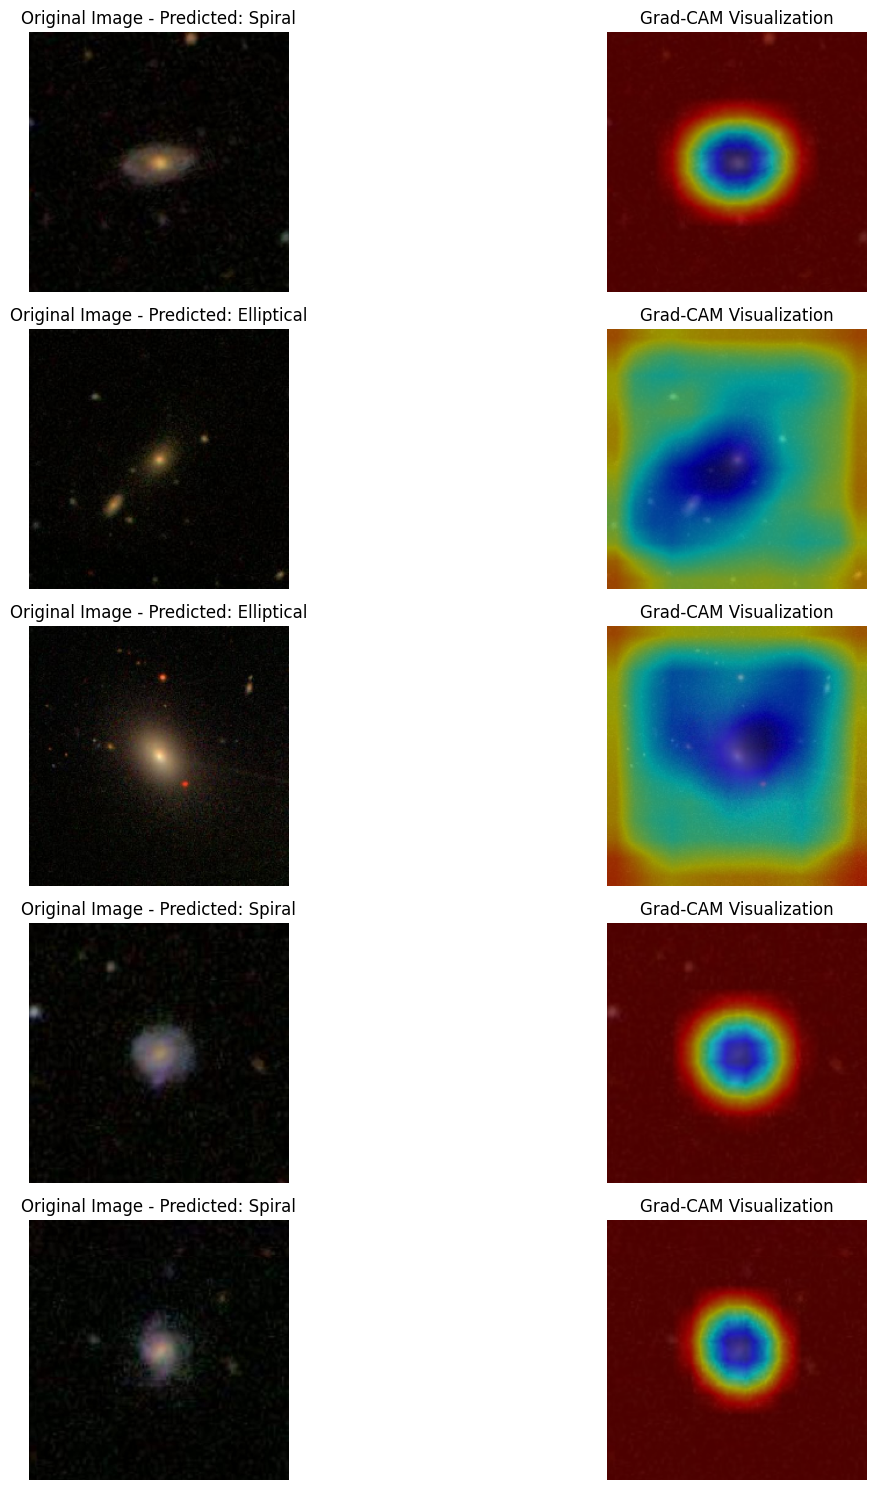

In [60]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2

# Define the Grad-CAM function
def grad_cam(model, image_path, class_idx, last_conv_layer_name="conv5_block3_out"):
    """
    Generates a Grad-CAM heatmap for the given image and class.
    Args:
    - model: The trained model.
    - image_path: Path to the input image.
    - class_idx: Index of the target class.
    - last_conv_layer_name: Name of the last convolutional layer.
    Returns:
    - The heatmap and the original image.
    """
    # Load and preprocess the image
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    # Create a model that maps the input image to the last conv layer and the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs],
        [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Get the feature maps and predictions
    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(img_array)
        loss = predictions[:, class_idx]

    # Compute the gradients of the target class score w.r.t. the feature maps
    grads = tape.gradient(loss, conv_outputs)

    # Compute the mean intensity of the gradients over the feature map
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # Multiply each feature map by the mean intensity of its gradient
    conv_outputs = conv_outputs[0]
    heatmap = tf.reduce_sum(tf.multiply(pooled_grads, conv_outputs), axis=-1)

    # Normalize the heatmap
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    return heatmap, img

# Function to overlay heatmap on the original image
def overlay_heatmap(heatmap, original_image, alpha=0.6, colormap=cv2.COLORMAP_JET):
    """
    Overlays the heatmap on the original image.
    Args:
    - heatmap: The generated heatmap.
    - original_image: The original image as a PIL Image.
    - alpha: Heatmap overlay intensity.
    - colormap: Colormap for the heatmap.
    Returns:
    - The image with heatmap overlay.
    """
    # Convert the original image to array
    original_image = np.array(original_image)

    # Resize the heatmap to match the image size
    heatmap = cv2.resize(heatmap, (original_image.shape[1], original_image.shape[0]))

    # Apply the colormap
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, colormap)

    # Combine the heatmap with the original image
    overlay_image = cv2.addWeighted(heatmap, alpha, original_image, 1 - alpha, 0)

    return overlay_image

# Visualize Grad-CAM on 5 random test images
import random

# Choose 5 random test images
random_images = random.sample(all_test_images, 5)

plt.figure(figsize=(15, 15))

for i, image_path in enumerate(random_images):
    # Preprocess the image and make a prediction
    img, img_array = preprocess_image(image_path)
    predictions = VGG16_model.predict(img_array)  # Change model as needed (e.g., ResNet50 or Custom CNN)
    predicted_class = np.argmax(predictions)

    # Generate Grad-CAM heatmap
    heatmap, original_img = grad_cam(VGG16_model, image_path, predicted_class, last_conv_layer_name="block5_conv3")

    # Overlay heatmap on the original image
    overlay_img = overlay_heatmap(heatmap, original_img)

    # Display the original image and Grad-CAM result
    plt.subplot(5, 2, i * 2 + 1)
    plt.imshow(original_img)
    plt.title(f"Original Image - Predicted: {class_labels[predicted_class]}")
    plt.axis('off')

    plt.subplot(5, 2, i * 2 + 2)
    plt.imshow(overlay_img)
    plt.title("Grad-CAM Visualization")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [57]:
from tensorflow.keras.models import load_model

# Load the VGG16 model
VGG16_model = load_model('/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/VGG16_model.h5')

# Load the ResNet50 model
ResNet50_model = load_model("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/ResNet50_model.h5")

# Load the Custom CNN model
CUSTOM_CNN_model = load_model("/content/drive/MyDrive/galaxy-zoo-the-galaxy-challenge v2/CustomCNN_model.h5")